<a href="https://www.kaggle.com/fanbyprinciple/github-themed-contribution-data-from-time-series?scriptVersionId=89004169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# github contributions

![](https://repository-images.githubusercontent.com/9631509/4afb3c00-3a47-11eb-9b5b-eaabf1171810)

Heavily inspired from Parul Pandey's : https://towardsdatascience.com/create-githubs-style-contributions-plot-for-your-time-series-data-79df84ec93da

Ill adapt for Jan 2022 tabular series data


In [1]:
data_path = "../input/tabular-playground-series-jan-2022/train.csv"
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
data = pd.read_csv(data_path, parse_dates=["date"])
data.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [2]:
#Importing the seaborn library along with other dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
# Creating new features from the data
data['year'] = [str(x).split('-')[0] for x in data['date']]
data['month'] = [str(x).split('-')[1] for x in data['date']]
data['day'] = [str(x).split('-')[2].split(" ")[0] for x in data['date']]

In [3]:
data.head()

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,01,01
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,01,01
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,01,01
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,01,01
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,01,01


In [4]:
data_2015 = data[data['year'] == "2015"]

print(data_2015.head())

data_2015 = data_2015[['month','day','num_sold']]
pivoted_data = pd.pivot_table(data_2015, values='num_sold', index=['month'] , columns=['day'], aggfunc=np.mean)

   row_id       date  country       store         product  num_sold  year  \
0       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329  2015   
1       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520  2015   
2       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146  2015   
3       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572  2015   
4       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911  2015   

  month day  
0    01  01  
1    01  01  
2    01  01  
3    01  01  
4    01  01  


In [5]:
pivoted_data.head()

day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
01,598.222222,555.444444,615.277778,595.944444,437.111111,423.000000,377.388889,380.722222,391.166667,453.333333,...,336.111111,358.500000,422.277778,431.888889,340.777778,334.666667,346.611111,344.500000,362.944444,432.222222
02,439.055556,357.222222,355.388889,356.666667,350.333333,375.111111,444.555556,440.222222,365.666667,358.833333,...,456.277778,368.611111,363.611111,363.277778,365.277778,373.833333,448.333333,NaN,NaN,NaN
03,462.888889,372.222222,360.444444,361.611111,360.444444,387.833333,463.611111,457.611111,366.833333,368.888889,...,455.666667,368.611111,360.611111,357.333333,362.166667,376.333333,454.777778,462.555556,363.833333,370.500000
04,351.944444,373.444444,392.444444,483.500000,505.611111,440.000000,470.000000,494.277778,518.166667,520.111111,...,345.888889,350.222222,371.388889,447.222222,433.166667,335.833333,348.500000,345.611111,350.888889,NaN
05,361.777778,449.833333,484.222222,394.555556,403.777778,409.833333,389.000000,386.222222,454.444444,450.722222,...,386.333333,456.222222,441.833333,352.611111,358.833333,384.555556,395.444444,432.277778,491.888889,468.166667


<AxesSubplot:xlabel='day', ylabel='month'>

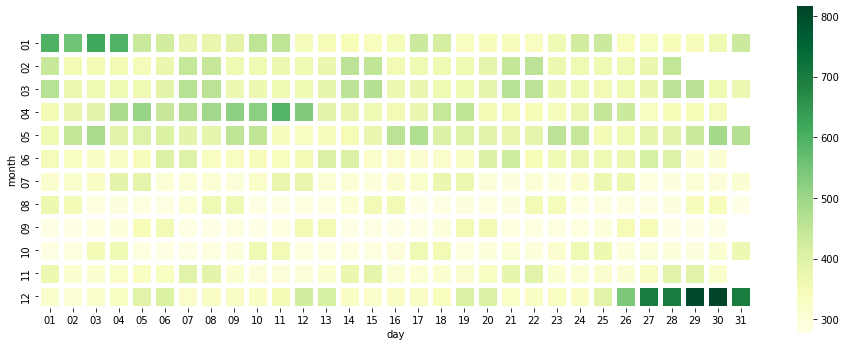

In [6]:
plt.figure(figsize = (16,6))
sns.heatmap(pivoted_data, linewidths=5, cmap='YlGn',linecolor='white', square=True)

It looks close but better representation would be for weekdays.

In [7]:
data['day_of_week'] = [int(x) % 7 for x in data['day']]

In [8]:
data['day_of_week']

0        1
1        1
2        1
3        1
4        1
        ..
26293    3
26294    3
26295    3
26296    3
26297    3
Name: day_of_week, Length: 26298, dtype: int64

   row_id       date  country       store         product  num_sold  year  \
0       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329  2015   
1       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520  2015   
2       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146  2015   
3       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572  2015   
4       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911  2015   

  month day  day_of_week  
0    01  01            1  
1    01  01            1  
2    01  01            1  
3    01  01            1  
4    01  01            1  


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

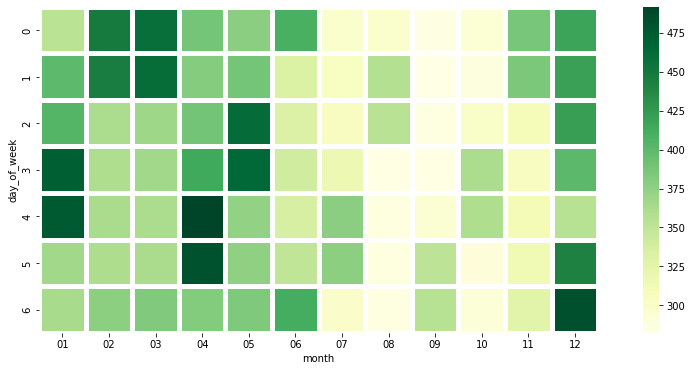

In [9]:
data_2015 = data[data['year'] == "2015"]

print(data_2015.head())

data_2015 = data_2015[['month','day_of_week','num_sold']]
pivoted_data = pd.pivot_table(data_2015, values='num_sold', index=['day_of_week'] , columns=['month'], aggfunc=np.mean)

plt.figure(figsize = (16,6))
sns.heatmap(pivoted_data, linewidths=5, cmap='YlGn',linecolor='white', square=True)

## USING CALMAPS

its very simple

In [10]:
#Installing and importing the calmap library
!pip install calmap
#import the library
import calmap

In [11]:
data.head().iloc[0]

row_id                           0
date           2015-01-01 00:00:00
country                    Finland
store                   KaggleMart
product                 Kaggle Mug
num_sold                       329
year                          2015
month                           01
day                             01
day_of_week                      1
Name: 0, dtype: object

<AxesSubplot:>

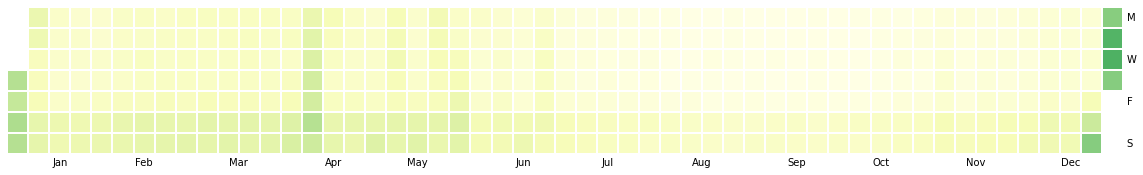

In [12]:
#Setting the date_time column as the index
data = data.set_index('date')
#plotting the calender heatmap for the year 2010
plt.figure(figsize=(20,10))
calmap.yearplot(data['num_sold'], cmap='YlGn', fillcolor='lightgrey',daylabels='MTWTFSS',dayticks=[0, 2, 4, 6],
                linewidth=2)

## trying to create my own



In [13]:
# adding custom images.